In [15]:
include("main.jl")
include("visual.jl");

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests C:\Users\ryara\.julia\packages\HypothesisTests\BgrVj\src\kolmogorov_smirnov.jl:68
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests C:\Users\ryara\.julia\packages\HypothesisTests\BgrVj\src\kolmogorov_smirnov.jl:68
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests C:\Users\ryara\.julia\packages\HypothesisTests\BgrVj\src\kolmogorov_smirnov.jl:68
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Wa

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191


┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191


┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191


┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191


┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\ryara\.julia\packages\PlotUtils\M092a\src\ticks.jl:191


┌ Info: Saved animation to C:\Users\ryara\AppData\Local\Temp\jl_7a9OT4FCxK.gif
└ @ Plots C:\Users\ryara\.julia\packages\Plots\Hxe7H\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\ryara\\AppData\\Local\\Temp\\jl_7a9OT4FCxK.gif")
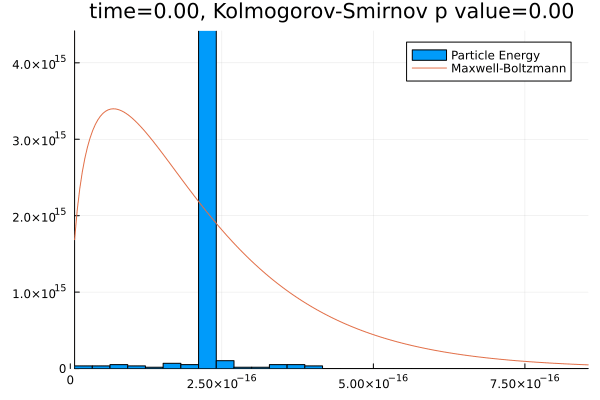

In [16]:
#Test 1 - Simple Argon gas
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = main(sys=sys, Nsteps=2000, Nsample=100)
plot_thermalization(samp)